
## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

## Importing dataset

In [2]:
file_path = 'World stroke congress data set 240 CTA and MRS.xlsx'
sheet_name = 'Dr Dulari Data Entry_21_feb_202'
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
data.head()

Name   age  gender  NIHSS  SHT   DM  Alcohol  tobacco  \
0    Prakash Deshmukh   72.0     1.0   22.0  1.0  1.0      2.0      2.0   
1        Nilesh Dhande  46.0     1.0    3.0  1.0  2.0      2.0      2.0   
2    Madhukar Khangute  82.0     1.0   22.0  1.0  1.0      2.0      2.0   
3  Bhalchandra govande  83.0     1.0    NaN  1.0  1.0      2.0      2.0   
4       Dharmraj Patil  78.0     1.0   16.0  1.0  1.0      2.0      1.0   

   smoking  dyslipidaemia  ...  Lt Proximal M1 MCA  Lt Distal M1 MCA  \
0      2.0            2.0  ...                 0.0               0.0   
1      2.0            2.0  ...                 2.0               2.0   
2      2.0            2.0  ...                 0.0               0.0   
3      2.0            2.0  ...                 0.0               0.0   
4      2.0            2.0  ...                 0.0               0.0   

   Lt M2MCA rear  Lt M2 MCA forward  Lt A1 ACA  clot burden score  \
0            1.0                1.0          1                3.0   
1            1.0                1.0          1                7.0   
2            0.0                0.0          0                3.0   
3            0.0                0.0          0                7.0   
4            0.0                0.0          0                9.0   

   Lt ICA origin  Rt ICA origin            CCA  MRS  
0            0.0            1.0              0  1.0  
1            1.0            1.0              0  0.0  
2            1.0            1.0              0  6.0  
3            1.0            1.0  Rt CCA plaque  6.0  
4            0.0            0.0              0  2.0  

[5 rows x 59 columns]

In [4]:
data.shape

(243, 59)

In [5]:
data.isna().sum()

Name                              3
age                               3
gender                            3
NIHSS                            30
SHT                               7
DM                                8
Alcohol                           8
tobacco                           8
smoking                           8
dyslipidaemia                     8
atrial fibrillation               7
IHD                               7
rheumatic heart disease           7
past history of stroke/TIA        8
haemoglobin                      14
PCV                              51
MCV                              61
Homocystiene                     37
HbA1C                            72
Cholesterol                      75
LDL Cholesterol                  79
HDL Cholesterol                  74
Triglycerides                    76
V LDL                            91
b 12                             46
Vit D                           230
CT ASPECTS                       59
TAN                         

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          240 non-null    object 
 1   age                           240 non-null    float64
 2   gender                        240 non-null    float64
 3   NIHSS                         213 non-null    float64
 4   SHT                           236 non-null    float64
 5   DM                            235 non-null    float64
 6   Alcohol                       235 non-null    float64
 7   tobacco                       235 non-null    float64
 8   smoking                       235 non-null    float64
 9   dyslipidaemia                 235 non-null    float64
 10  atrial fibrillation           236 non-null    float64
 11  IHD                           236 non-null    float64
 12  rheumatic heart disease       236 non-null    float64
 13  past 

In [7]:
data.nunique()

Name                            235
age                              61
gender                            2
NIHSS                            28
SHT                               2
DM                                2
Alcohol                           2
tobacco                           2
smoking                           2
dyslipidaemia                     2
atrial fibrillation               2
IHD                               2
rheumatic heart disease           2
past history of stroke/TIA        2
haemoglobin                      80
PCV                             130
MCV                             138
Homocystiene                    187
HbA1C                            62
Cholesterol                     103
LDL Cholesterol                 137
HDL Cholesterol                  41
Triglycerides                   119
V LDL                           108
b 12                            123
Vit D                            12
CT ASPECTS                        9
TAN                         

### Selecting features manually

In [8]:
data.columns

Index(['Name', 'age', 'gender', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'tobacco',
       'smoking', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'past history of stroke/TIA', 'haemoglobin',
       'PCV', 'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'LDL Cholesterol',
       'HDL Cholesterol', 'Triglycerides', 'V LDL', 'b 12', 'Vit D',
       'CT ASPECTS', 'TAN', 'MAS', 'MITEFF', 'MCTA', 'Cerebral collaterals',
       'ecosprine', 'clopidogril', 'thrombolysis', 'thrombolytic agent',
       'anticoagulation', 'mechanical thrombectomy',
       'decompressive hemicranectomy', 'barthel index', 'Rt infraclinoid ICA',
       'Rt Supraclinoid ICA', 'Rt Proximal M1 MCA', 'Rt Distal M1 MCA',
       'Rt M2MCA rear', 'Rt M2 MCA forward', 'Rt A1 ACA',
       'Lt infraclinoid ICA', 'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA',
       'Lt Distal M1 MCA', 'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA',
       'clot burden score', 'Lt ICA origin', 'Rt ICA origin', 'CCA

In [9]:
# important_features = ['Name', 'COMPLETE', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT',
#        'DM', 'Alcohol', 'tobacco', 'smoking', 'dyslipidaemia',
#        'atrial fibrillation', 'IHD', 'rheumatic heart disease',
#        'past history of stroke/TIA', 'haemoglobin', 'PCV', 'MCV',
#        'Homocystiene', 'HbA1C', 'Cholesterol', 'LDL Cholesterol',
#        'HDL Cholesterol', 'Triglycerides', 'V LDL', 'b 12', 'Vit D',
#        'CT ASPECTS', 'TAN', 'MAS', 'MITEFF', 'MCTA', 'collaterals',
#        'ecosprine', 'clopidogril', 'thrombolysis', 'thrombolytic agent',
#        'anticoagulation', 'mechanical thrombectomy',
#        'decompressive hemicranectomy', 'MRS', 'barthel index',
#        'Rt infraclinoid ICA', 'Rt Supraclinoid ICA', 'Rt Proximal M1 MCA',
#        'Rt Distal M1 MCA', 'Rt M2MCA rear', 'Rt M2 MCA forward', 'Rt A1 ACA',
#        'Lt infraclinoid ICA', 'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA',
#        'Lt Distal M1 MCA', 'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA',
#        'clot burden score', 'Lt ICA origin', 'Rt ICA origin', 'CCA']

In [10]:
important_features = ['Name', 'age', 'gender', 'NIHSS', 'SHT','DM', 'Alcohol', 
                      'tobacco', 'smoking', 'atrial fibrillation', 'IHD',
                      'rheumatic heart disease', 'past history of stroke/TIA',  'Cerebral collaterals','clot burden score', 'MRS']

In [11]:
# Reorder the DataFrame columns
data = data[important_features]

In [12]:
data = data.iloc[:-3]

In [13]:
data.head()

Name   age  gender  NIHSS  SHT   DM  Alcohol  tobacco  \
0    Prakash Deshmukh   72.0     1.0   22.0  1.0  1.0      2.0      2.0   
1        Nilesh Dhande  46.0     1.0    3.0  1.0  2.0      2.0      2.0   
2    Madhukar Khangute  82.0     1.0   22.0  1.0  1.0      2.0      2.0   
3  Bhalchandra govande  83.0     1.0    NaN  1.0  1.0      2.0      2.0   
4       Dharmraj Patil  78.0     1.0   16.0  1.0  1.0      2.0      1.0   

   smoking  atrial fibrillation  IHD  rheumatic heart disease  \
0      2.0                  2.0  2.0                      2.0   
1      2.0                  2.0  2.0                      2.0   
2      2.0                  2.0  1.0                      2.0   
3      2.0                  1.0  2.0                      2.0   
4      2.0                  2.0  2.0                      2.0   

   past history of stroke/TIA  Cerebral collaterals  clot burden score  MRS  
0                         2.0                   0.0                3.0  1.0  
1                         2.0                   0.0                7.0  0.0  
2                         2.0                   0.0                3.0  6.0  
3                         1.0                   0.0                7.0  6.0  
4                         2.0                   0.0                9.0  2.0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        240 non-null    object 
 1   age                         240 non-null    float64
 2   gender                      240 non-null    float64
 3   NIHSS                       213 non-null    float64
 4   SHT                         236 non-null    float64
 5   DM                          235 non-null    float64
 6   Alcohol                     235 non-null    float64
 7   tobacco                     235 non-null    float64
 8   smoking                     235 non-null    float64
 9   atrial fibrillation         236 non-null    float64
 10  IHD                         236 non-null    float64
 11  rheumatic heart disease     236 non-null    float64
 12  past history of stroke/TIA  235 non-null    float64
 13  Cerebral collaterals        184 non

# Data Preprocessing

## Dealing with NULL values

In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isna().sum() / len(data)) * 100

# Filter only the columns that have missing values > 20%
missing_percentage = missing_percentage[missing_percentage > 20]

print(missing_percentage)

Cerebral collaterals    23.333333
dtype: float64


### Dropping columns with >20% missing values


In [16]:
# # Identify columns with more than 20% missing values
# columns_to_drop = missing_percentage[missing_percentage > 20].index

# # Drop these columns
# data = data.drop(columns=columns_to_drop)

In [17]:
# # Display the remaining columns
# print("Dropped columns:", columns_to_drop)
# print("Remaining columns:", data.columns)

In [18]:
data.shape

(240, 16)

In [19]:
data.drop(columns=["Name"], inplace=True)

In [20]:
data.head()

age  gender  NIHSS  SHT   DM  Alcohol  tobacco  smoking  \
0  72.0     1.0   22.0  1.0  1.0      2.0      2.0      2.0   
1  46.0     1.0    3.0  1.0  2.0      2.0      2.0      2.0   
2  82.0     1.0   22.0  1.0  1.0      2.0      2.0      2.0   
3  83.0     1.0    NaN  1.0  1.0      2.0      2.0      2.0   
4  78.0     1.0   16.0  1.0  1.0      2.0      1.0      2.0   

   atrial fibrillation  IHD  rheumatic heart disease  \
0                  2.0  2.0                      2.0   
1                  2.0  2.0                      2.0   
2                  2.0  1.0                      2.0   
3                  1.0  2.0                      2.0   
4                  2.0  2.0                      2.0   

   past history of stroke/TIA  Cerebral collaterals  clot burden score  MRS  
0                         2.0                   0.0                3.0  1.0  
1                         2.0                   0.0                7.0  0.0  
2                         2.0                   0.0                3.0  6.0  
3                         1.0                   0.0                7.0  6.0  
4                         2.0                   0.0                9.0  2.0

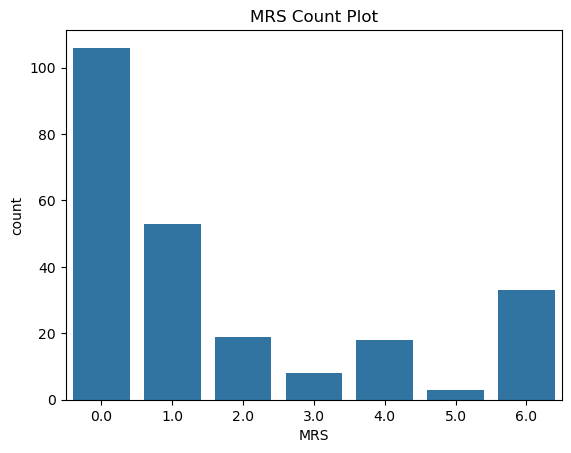

In [21]:
plt.figure()
plt.title('MRS Count Plot')
sns.countplot(data=data, x='MRS')
plt.show()

### Converting MRS to Good MRS and Bad MRS

In [22]:
# 1 = Good, 0 = Bad
data['MRS_Class'] = pd.Series()
for index, value in data['MRS'].items():
    if (value <= 2):
      data.loc[index,'MRS_Class'] = 1
    else:
      data.loc[index,'MRS_Class'] = 0

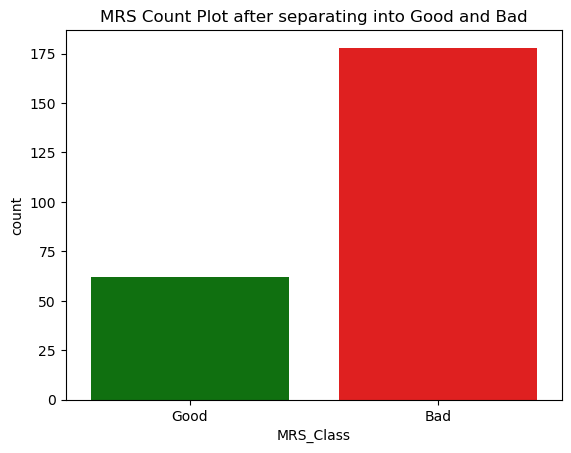

In [23]:
plt.figure()
plt.title('MRS Count Plot after separating into Good and Bad')

# Set the x variable to hue and use integer keys for the palette
sns.countplot(data=data, x='MRS_Class', hue='MRS_Class', palette={0: 'green', 1: 'red'}, legend=False)

# Set the custom x-tick labels
plt.xticks(ticks=[0, 1], labels=['Good', 'Bad'])

plt.show()

## Ajusting Columns

### Replacing M=1 and F=0

In [24]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {1, 2}]

for col in binary_columns:
    data.loc[data[col] == 2, col] = 0

In [25]:
data.reset_index(inplace=True, drop=True)

In [26]:
data.head()

age  gender  NIHSS  SHT   DM  Alcohol  tobacco  smoking  \
0  72.0     1.0   22.0  1.0  1.0      0.0      0.0      0.0   
1  46.0     1.0    3.0  1.0  0.0      0.0      0.0      0.0   
2  82.0     1.0   22.0  1.0  1.0      0.0      0.0      0.0   
3  83.0     1.0    NaN  1.0  1.0      0.0      0.0      0.0   
4  78.0     1.0   16.0  1.0  1.0      0.0      1.0      0.0   

   atrial fibrillation  IHD  rheumatic heart disease  \
0                  0.0  0.0                      0.0   
1                  0.0  0.0                      0.0   
2                  0.0  1.0                      0.0   
3                  1.0  0.0                      0.0   
4                  0.0  0.0                      0.0   

   past history of stroke/TIA  Cerebral collaterals  clot burden score  MRS  \
0                         0.0                   0.0                3.0  1.0   
1                         0.0                   0.0                7.0  0.0   
2                         0.0                   0.0                3.0  6.0   
3                         1.0                   0.0                7.0  6.0   
4                         0.0                   0.0                9.0  2.0   

  MRS_Class  
0         1  
1         1  
2         0  
3         0  
4         1

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         240 non-null    float64
 1   gender                      240 non-null    float64
 2   NIHSS                       213 non-null    float64
 3   SHT                         236 non-null    float64
 4   DM                          235 non-null    float64
 5   Alcohol                     235 non-null    float64
 6   tobacco                     235 non-null    float64
 7   smoking                     235 non-null    float64
 8   atrial fibrillation         236 non-null    float64
 9   IHD                         236 non-null    float64
 10  rheumatic heart disease     236 non-null    float64
 11  past history of stroke/TIA  235 non-null    float64
 12  Cerebral collaterals        184 non-null    float64
 13  clot burden score           240 non

In [28]:
data.to_csv('Cleaned_Data.csv', index=False)
data = pd.read_csv('Cleaned_Data.csv')

## Correlation Matrix

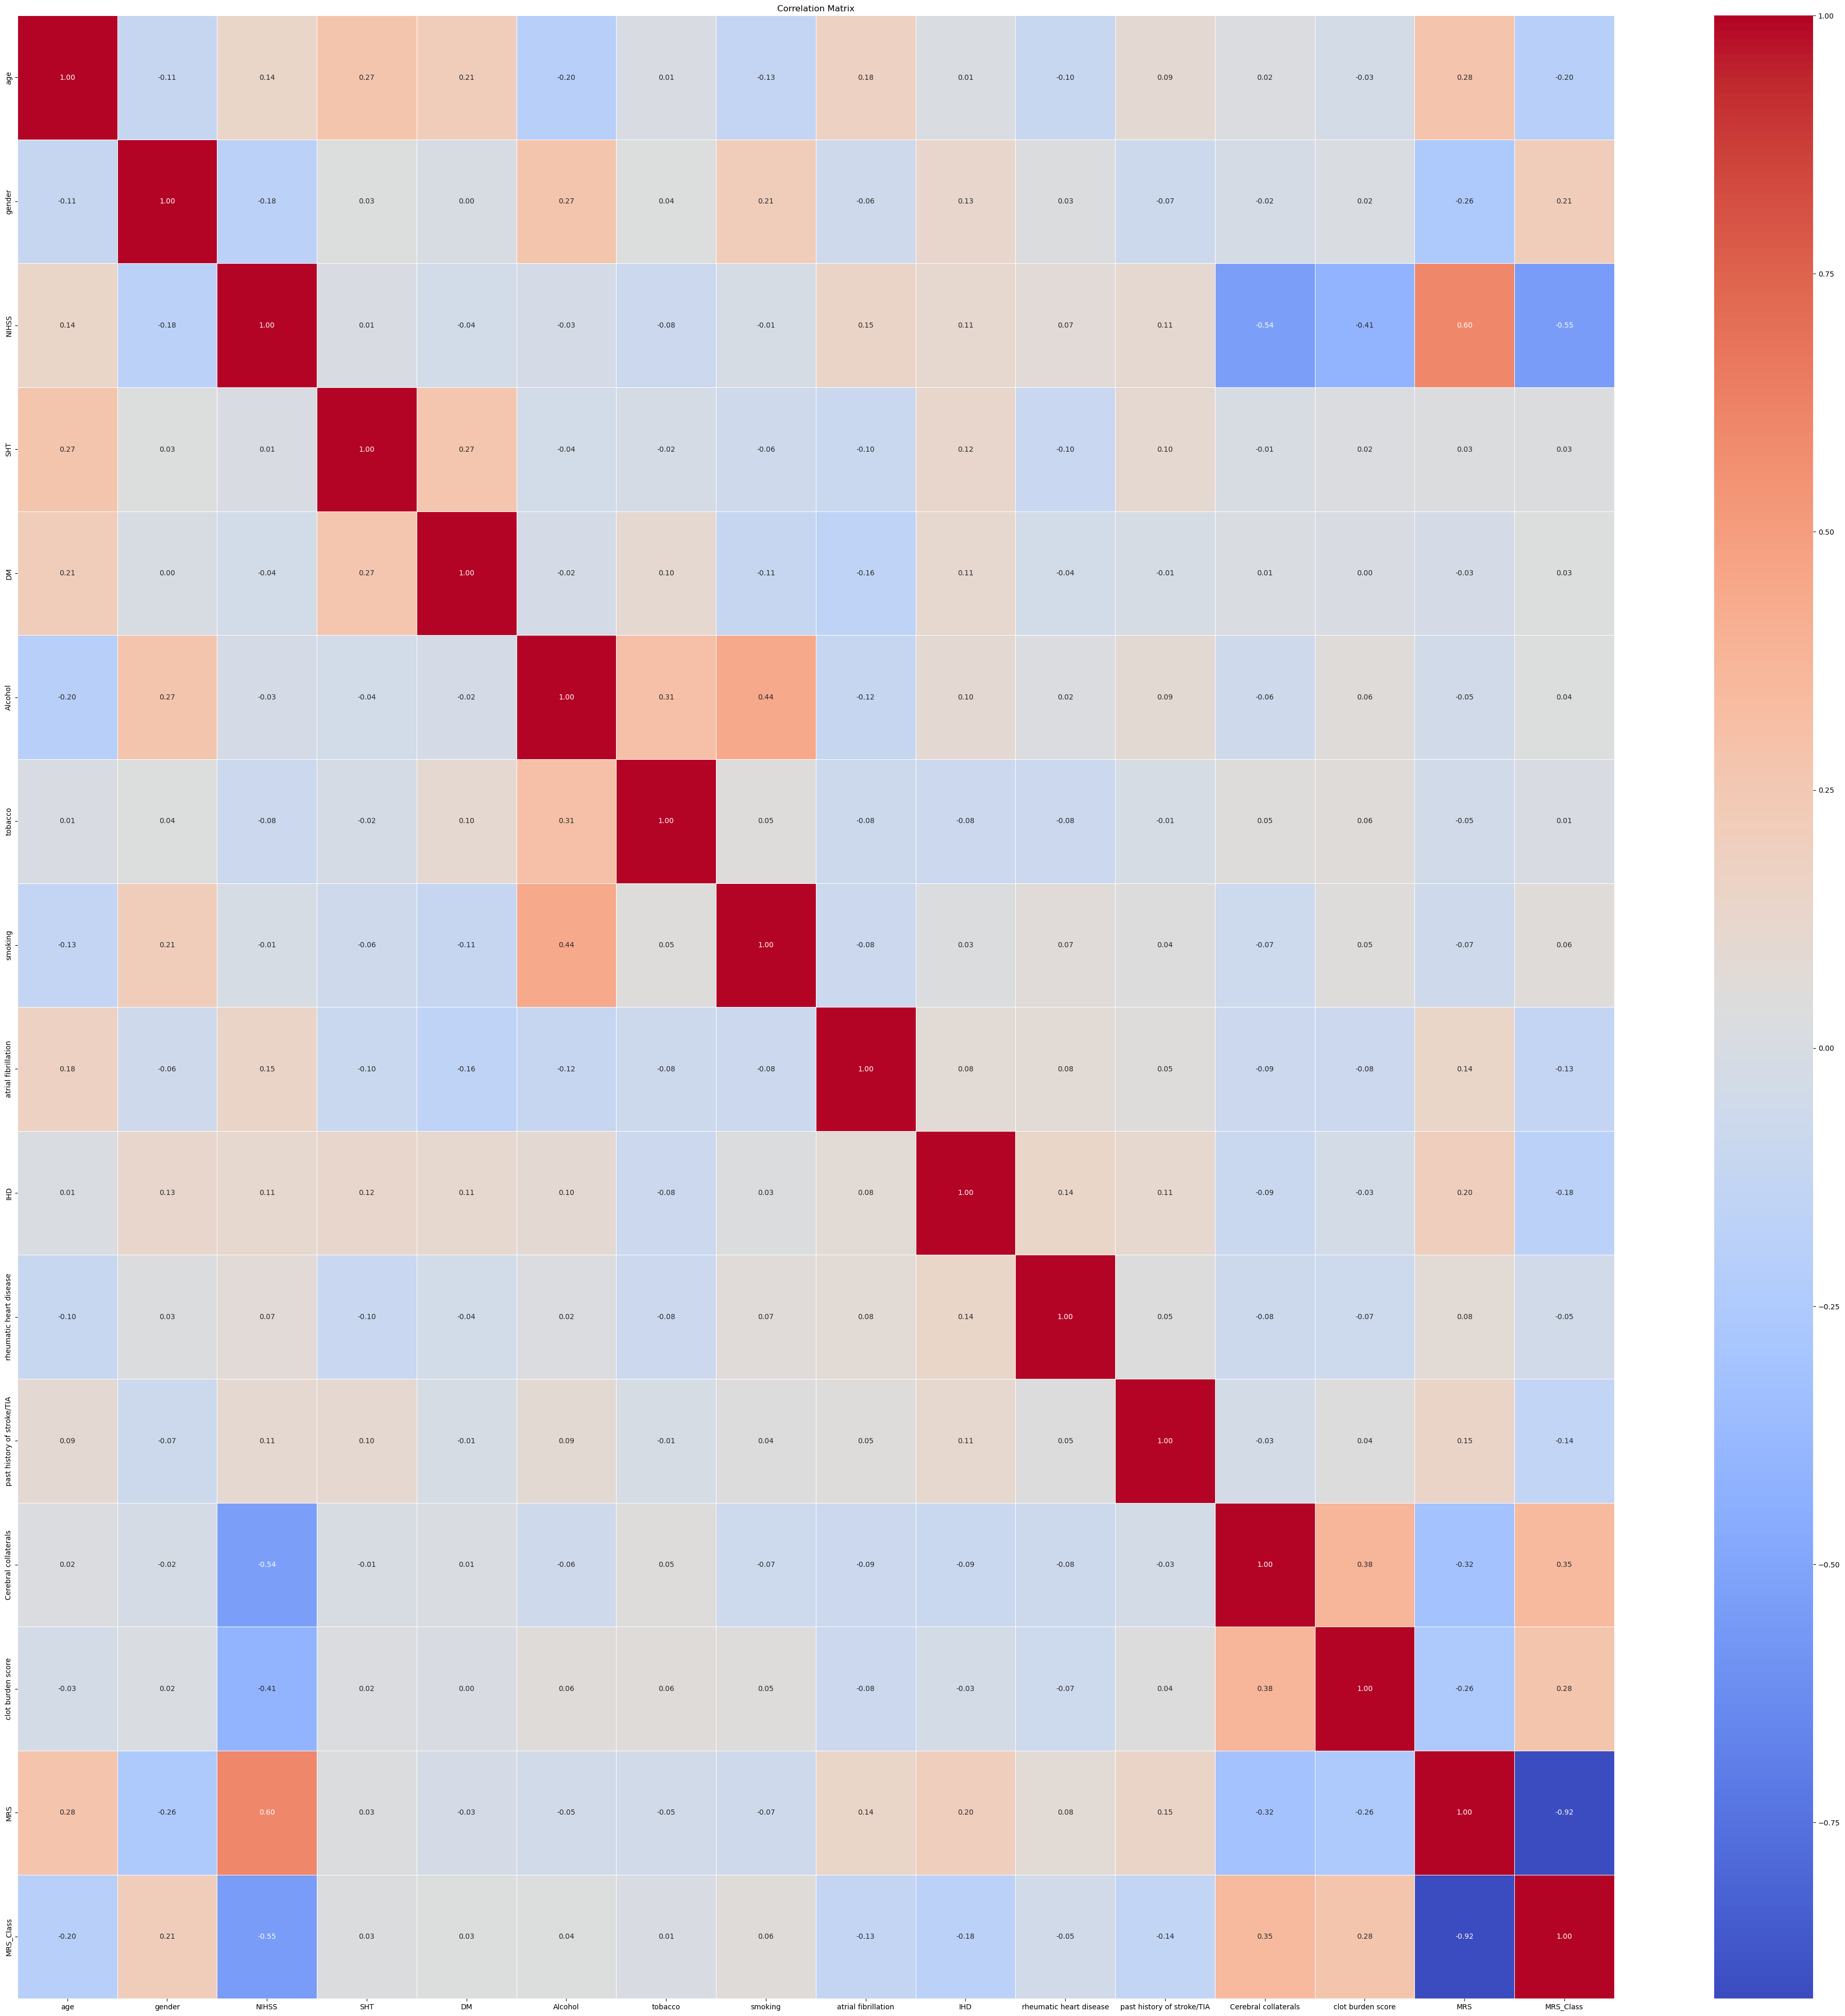

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Extraction

In [30]:
y = data.iloc[:,-1].values
X = data.drop(columns=["MRS", "MRS_Class"])
X = X.to_numpy()

In [31]:
y

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [32]:
X

array([[72.,  1., 22., ...,  0.,  0.,  3.],
       [46.,  1.,  3., ...,  0.,  0.,  7.],
       [82.,  1., 22., ...,  0.,  0.,  3.],
       ...,
       [73.,  1.,  6., ...,  0., nan,  8.],
       [71.,  0., nan, ...,  0., nan,  9.],
       [76.,  0., nan, ...,  1., nan,  9.]])

In [33]:
X.shape

(240, 14)

## Preprocessing Pipeline

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [35]:
data.isna().sum()

age                            0
gender                         0
NIHSS                         27
SHT                            4
DM                             5
Alcohol                        5
tobacco                        5
smoking                        5
atrial fibrillation            4
IHD                            4
rheumatic heart disease        4
past history of stroke/TIA     5
Cerebral collaterals          56
clot burden score              0
MRS                            0
MRS_Class                      0
dtype: int64

In [36]:
# Identify binary features
binary_features = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]
binary_features.remove('MRS_Class')

# Get indices of binary features in the DataFrame
binary_features_indices = [data.columns.get_loc(feature) for feature in binary_features]

# Create the binary transformer
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [37]:
data.columns[binary_features_indices]

Index(['gender', 'SHT', 'DM', 'Alcohol', 'tobacco', 'smoking',
       'atrial fibrillation', 'IHD', 'rheumatic heart disease',
       'past history of stroke/TIA', 'Cerebral collaterals'],
      dtype='object')

In [38]:
# Identify numeric features by excluding the binary features from the DataFrame
numeric_features = [col for col in data.columns if col not in binary_features]
# Remove both 'MRS_Class' and 'MRS'
numeric_features = [feature for feature in numeric_features if feature not in ['MRS_Class', 'MRS']]

# Get indices of numeric features in the DataFrame
numeric_features_indices = [data.columns.get_loc(feature) for feature in numeric_features]

# Create the numeric transformer
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

In [39]:
data.columns[numeric_features_indices]

Index(['age', 'NIHSS', 'clot burden score'], dtype='object')

In [40]:
numeric_features_indices

[0, 2, 13]

In [41]:
# Create the column transformer for the entire preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_indices),
        ("bin", binary_transformer, binary_features_indices),
    ]
)

In [42]:
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

# Prediction

## Importing Different Models

Top 7 Models:
1. LGMBClassifier
2. GradientBoostingClassifier
3. XGBoostClassifier
4. BaggingClassifier
5. AdaBoostClassifier
6. DecisionTreeClassifier
7. RandomForestClassifier


In [43]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

## Model Pipeline

In [44]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessing_pipeline),
        ('classifier', DecisionTreeClassifier())
    ]
)

## Cross Validation Pipeline

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [46]:
# Define parameters for GridSearchCV
param_grid = [
    # Parameters for Decision Tree
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [5, 10, None],
        'classifier__criterion': ['gini', 'entropy']
    },
    # Parameters for Random Forest
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 20, 30],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__bootstrap': [True]
    },
    # Parameters for AdaBoost
    {
        'classifier': [AdaBoostClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=3)]
    },
    # Parameters for Gradient Boosting
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__max_depth': [3, 5]
    },
    # Parameters for XGBoost
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.1, 0.01]
    },
    # Parameters for LGBM
    {
        'classifier': [LGBMClassifier()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10],
        'classifier__learning_rate': [0.1, 0.01],
        'classifier__num_leaves': [7, 15, 31]
    },
    # Parameters for Bagging Classifier
    {
        'classifier': [BaggingClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__estimator': [DecisionTreeClassifier(max_depth=5)]
    }
]

## Grid Search Cross Validation

In [47]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [48]:
# grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit=False, verbose=2)
# grid.fit(X, y)

In [49]:
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit='f1', verbose=2)
grid.fit(X, y)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=5; total time

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier()

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('scaler',
                                                                                                           MinMaxScaler())]),
                                                                                          [0,
                                                                                           2,
                                                                                           13]),
                                                                                         ('bin',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='most_frequent'))...
                          'classifier__learning_rate': [0.1, 0.01],
                          'classifier__max_depth': [3, 5, 10],
                          'classifier__n_estimators': [50, 100, 200],
                          'classifier__num_leaves': [7, 15, 31]},
                         {'classifier': [BaggingClassifier()],
                          'classifier__estimator': [DecisionTreeClassifier(max_depth=5)],
                          'classifier__n_estimators': [50, 100]}],
             refit='f1',
             scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard',
                      'balanced_accuracy'],
             verbose=2)

# Saving Model

In [50]:
import joblib

# Save the entire GridSearchCV object
grid_filename = 'GSCV_NOFS_240_Patients.pkl'
joblib.dump(grid, grid_filename)

print(f"Complete GridSearchCV model saved as '{grid_filename}'")

Complete GridSearchCV model saved as 'GSCV_NOFS_240_Patients.pkl'


In [51]:
print(grid.best_params_)

{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}


In [52]:
print(grid.best_score_)

0.8775839546892177


In [53]:
from datetime import datetime

# List of scoring metrics used in GridSearchCV
scoring_metrics = ['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy']

# Extracting the parameter settings for each run and combining them into one column
params_summary = grid.cv_results_['params']
combined_params = [str(param_set) for param_set in params_summary]

# Creating an initial DataFrame with combined parameters
df = pd.DataFrame({'Parameters': combined_params})

# Adding mean scores for each scoring metric to the DataFrame
for metric in scoring_metrics:
    mean_score_key = f'mean_test_{metric}'
    
    if mean_score_key in grid.cv_results_:
        # Extract the mean scores and add to the DataFrame
        df[f'Mean {metric.capitalize()} Score'] = np.round_(grid.cv_results_[mean_score_key], 6)
    else:
        print(f"Metric '{metric}' not found in cv_results_")

# Sorting by F1 Score as it was the refit metric
df = df.sort_values(by='Mean F1 Score', ascending=False)

# Saving the DataFrame to an Excel file
current_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
result_filename = 'MRS Prediction Results 240 patients with NO FS--' + current_datetime + '.xlsx'
df.to_excel(result_filename, index=False)

print(f"Results saved to {result_filename}")


Results saved to MRS Prediction Results 240 patients with NO FS--23-04-2025-00-22-21.xlsx


# Confusion Matrix + Model Evaluation

## Load Libraries

In [54]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    f1_score, recall_score, roc_auc_score, jaccard_score, 
    balanced_accuracy_score, precision_score
)
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold

## Load Best GSCV Model

In [55]:
# Load the saved GridSearchCV object
grid_filename = 'GSCV_NOFS_240_Patients.pkl'
grid = joblib.load(grid_filename)

# Extract the best model from the loaded GridSearchCV object
best_model = grid.best_estimator_

print("Best Model Loaded Successfully!")

Best Model Loaded Successfully!


## Load and Preprocess the Data

In [56]:
# Load your cleaned data
data = pd.read_csv('Cleaned_Data.csv')

# Separate features and target variable
y = data.iloc[:, -1].values
X = data.drop(columns=["MRS", "MRS_Class"]).to_numpy()

# # Handle missing values by imputing them
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

## Perform K-Fold CV

In [57]:
# Perform K-Fold cross-validation with 10 splits
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Use cross_val_predict to get cross-validated predictions
y_pred = cross_val_predict(best_model, X, y, cv=kf)

print("Cross-Validation Completed!")

Cross-Validation Completed!


## Confusion Matrix

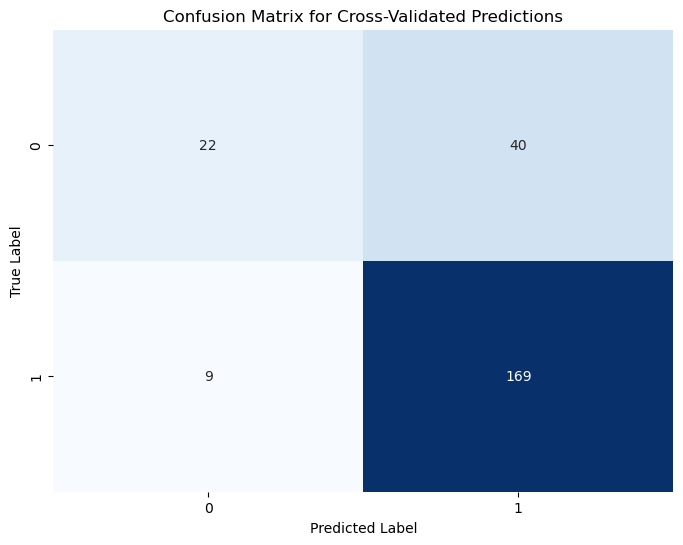

Confusion Matrix Generated and Saved!


In [58]:
# Generate confusion matrix for cross-validated predictions
conf_matrix = confusion_matrix(y, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Cross-Validated Predictions')

# Save the plot
plt.savefig('Confusion_Matrix_Best_Performing_GSCV_240_Patients_NOFS.png', dpi=300)
plt.show()

print("Confusion Matrix Generated and Saved!")

## Classification Report

In [59]:
# Generate and print a detailed classification report for cross-validated predictions
classification_rep = classification_report(y, y_pred)
print("\nClassification Report for Cross-Validated Predictions:\n", classification_rep)


Classification Report for Cross-Validated Predictions:
               precision    recall  f1-score   support

           0       0.71      0.35      0.47        62
           1       0.81      0.95      0.87       178

    accuracy                           0.80       240
   macro avg       0.76      0.65      0.67       240
weighted avg       0.78      0.80      0.77       240



## CV Scores

In [60]:
# Perform cross-validation on the best model to assess overfitting
# Cross-validate using 10 folds and the 'f1' scoring metric
cross_val_scores = cross_val_score(best_model, X, y, cv=kf, scoring='f1')

# Print scores
print("\nCross-Validation F1 Scores:", cross_val_scores)
print("Mean F1 Score from Cross-Validation:", np.mean(cross_val_scores))


Cross-Validation F1 Scores: [0.92307692 0.85       0.86486486 0.9047619  0.87179487 0.9
 0.81081081 0.85714286 0.84210526 0.9       ]
Mean F1 Score from Cross-Validation: 0.8724557495610126


## Extract Best Performing Models

In [61]:
# Extract GridSearchCV results into DataFrame
df_results = pd.DataFrame(grid.cv_results_)
df_results = df_results.sort_values(by='mean_test_f1', ascending=False)

# Get unique top-performing model instances
unique_models = df_results['param_classifier'].unique()
top_models = []

for model in unique_models:
    top_model = df_results[df_results['param_classifier'] == model].head(1)
    top_models.append(top_model)

# Concatenate all top-performing unique models
top_models_df = pd.concat(top_models)

print("Top-Performing Models Extracted!")

Top-Performing Models Extracted!


## Metrics of Top Performing Models

In [62]:
# Initialize a list to store metrics for each unique top model
metrics_list = []

# Evaluate metrics for the top-performing unique models using cross-validation
for index, row in top_models_df.iterrows():
    model_params = row['params']
    
    # Set the model with the corresponding parameters
    model = model_params['classifier']
    model.set_params(**{
        key.replace('classifier__', ''): value 
        for key, value in model_params.items() 
        if key.startswith('classifier__')
    })
    
    # Perform cross-validation and predict
    y_pred = cross_val_predict(model, X, y, cv=kf)
    
    # Calculate metrics
    metrics = {
        'Model': type(model).__name__,
        'Accuracy': accuracy_score(y, y_pred),
        'F1 Score': f1_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'ROC AUC': roc_auc_score(y, y_pred),
        'Jaccard': jaccard_score(y, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y, y_pred)
    }
    metrics_list.append(metrics)

print("Performance Metrics Computed!")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 159, number of negative: 57
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.736111 -> initscore=1.025853
[LightGBM] [Info] Start training from score 1.025853
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

Performance Metrics Computed!


## Save Metrics

In [63]:
# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Save metrics to an Excel file
metrics_filename = 'Top_Unique_Models_Metrics_240_Patients_NOFS.xlsx'
metrics_df.to_excel(metrics_filename, index=False)

print(f"Metrics saved to '{metrics_filename}'!")

Metrics saved to 'Top_Unique_Models_Metrics_240_Patients_NOFS.xlsx'!
